#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

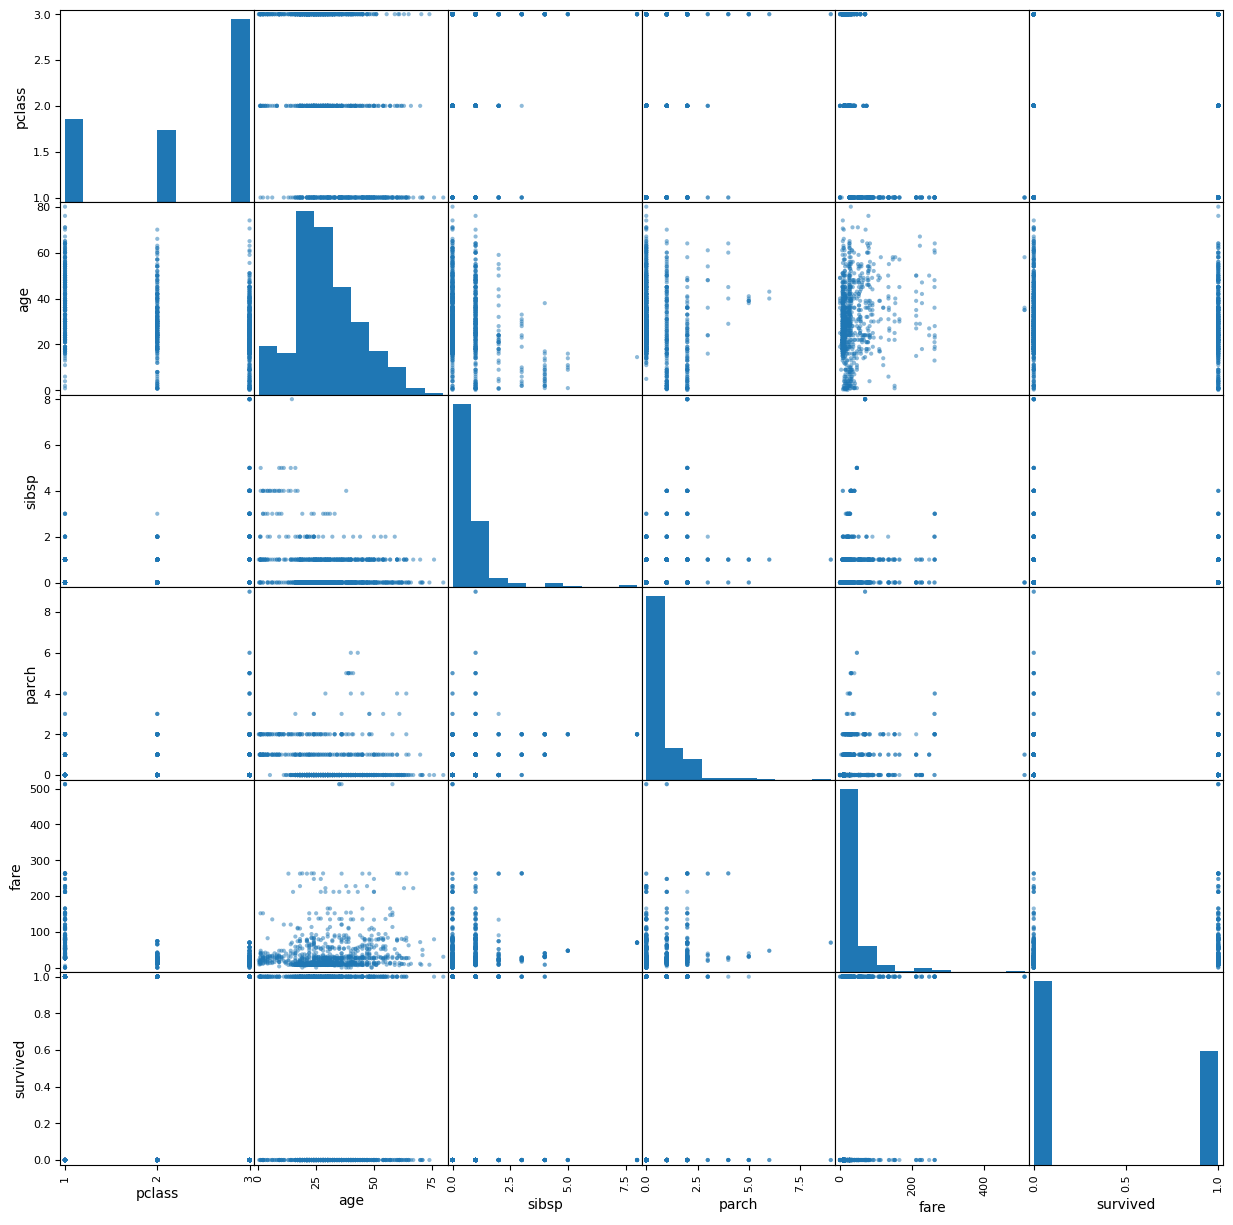

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('data/titanic.csv')
pd.plotting.scatter_matrix(data, figsize=(15, 15))
plt.show()

In [7]:
data['sex'] = data['sex'].map({'female':0, 'male':1})
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,0


#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

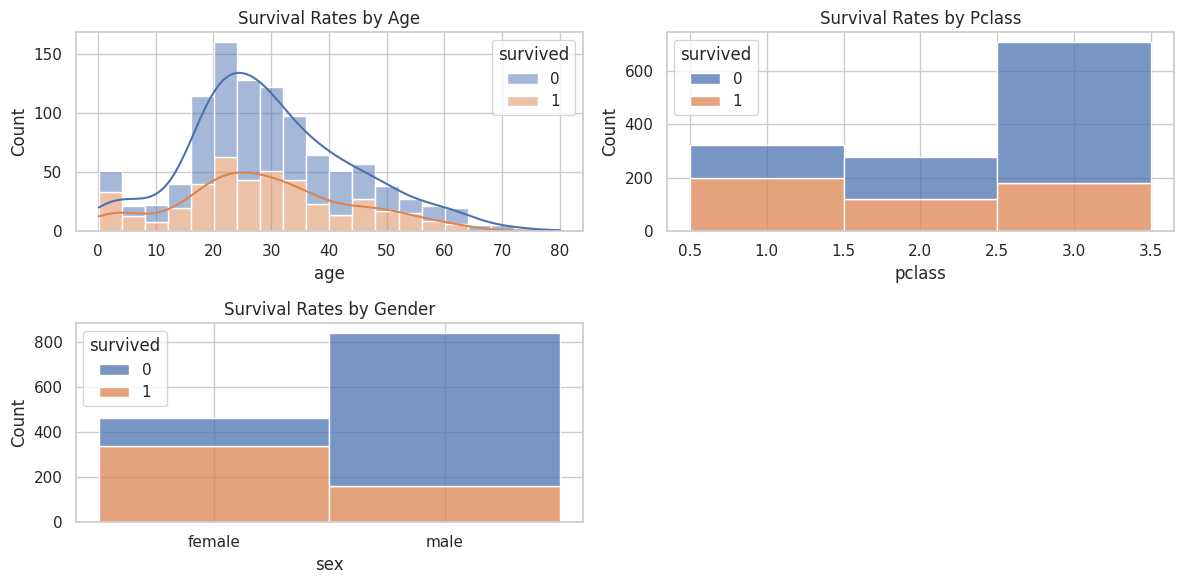

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot survival rates by Age
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='age', hue='survived', multiple='stack', bins=20, kde=True)
plt.title('Survival Rates by Age')

# Plot survival rates by Pclass
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='pclass', hue='survived', multiple='stack', discrete=True)
plt.title('Survival Rates by Pclass')

# Plot survival rates by Gender
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='sex', hue='survived', multiple='stack', discrete=True)
plt.title('Survival Rates by Gender')

plt.tight_layout()
plt.show()

#data[['age', 'survived']].plot.hist(by='age')
#data[['pclass', 'survived']].plot.hist(by='pclass')
#data[['sex', 'survived']].plot.hist(by='sex')

array([<Axes: title={'center': 'female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'male'}, ylabel='Frequency'>], dtype=object)

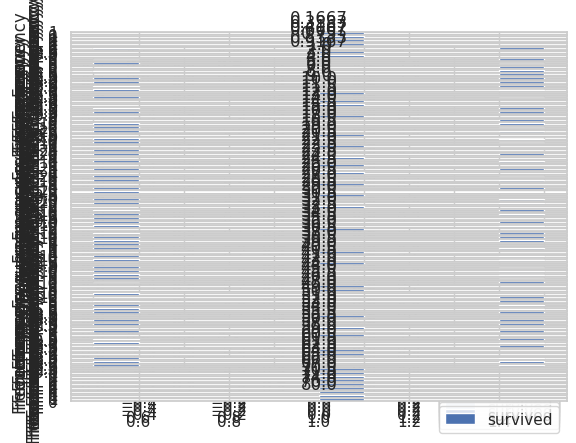

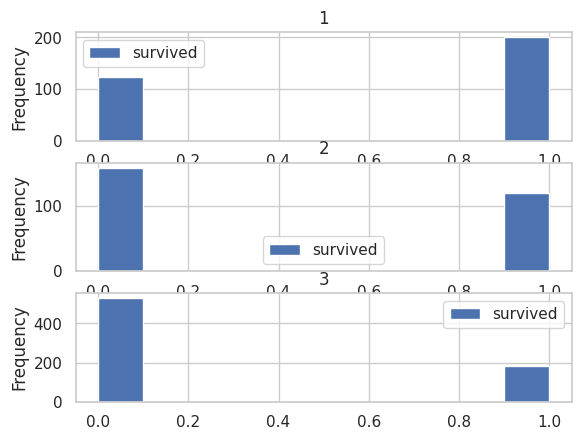

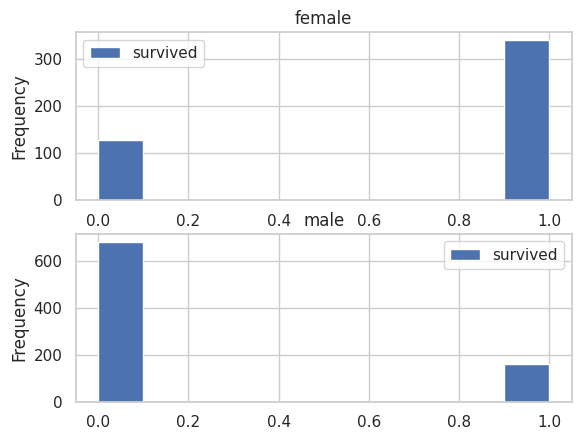

In [17]:
data[['age', 'survived']].plot.hist(by='age')
data[['pclass', 'survived']].plot.hist(by='pclass')
data[['sex', 'survived']].plot.hist(by='sex')

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X= imputer.fit_transform(data.age.to_numpy().reshape())
data['age']


(1309, 11)

#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

_Note, the following exercises use the housing data introduced in this week's lecture notes._

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

data.head()

data['ticket'] = pd.to_numeric(data['ticket'], errors='coerce')

# Assuming you have a DataFrame 'df' with the provided data
# Replace 'df' with the actual DataFrame variable name

# Drop irrelevant columns (e.g., 'name', 'ticket', 'cabin') and handle missing values
df = data.drop(['name', 'ticket', 'cabin'], axis=1)
df = df.dropna()

# Encode categorical variables ('sex' and 'embarked') using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Assuming 'survived' is the target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize Logistic Regression and Decision Tree classifiers
logreg_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Decision Tree Cross-Validation Scores:", dt_scores)

# Calculate and display the mean accuracy for each classifier
print("Mean Accuracy - Logistic Regression:", logreg_scores.mean())
print("Mean Accuracy - Decision Tree:", dt_scores.mean())



Logistic Regression Cross-Validation Scores: [0.54545455 0.88516746 0.81818182 0.75961538 0.63942308]
Decision Tree Cross-Validation Scores: [0.49282297 0.69856459 0.66985646 0.70192308 0.61057692]
Mean Accuracy - Logistic Regression: 0.7295684578579316
Mean Accuracy - Decision Tree: 0.6347488038277513


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [29]:
df = pd.read_csv('data/housing.tgz', compression='gzip')
df.shape

(20641, 10)

In [19]:
df.head()

,housing/,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'housing' with the provided data
# Replace 'housing' with the actual DataFrame variable name

df.isna().sum()

median_value = df['total_bedrooms'].median()

# Replace NaNs with the median value in the specified column
df['total_bedrooms'].fillna(median_value, inplace=True)

df = df.dropna()
df.isna().sum()





housing/              0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the housing data (replace 'path_to_housing_csv' with the actual path)
median_value = df['total_bedrooms'].median()

# Replace NaNs with the median value in the specified column
df['total_bedrooms'].fillna(median_value, inplace=True)

df = df.dropna()
housing = df

# Select features and target variable
X = housing.drop('median_house_value', axis=1)
le = LabelEncoder()
X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])


y = housing['median_house_value']

# Take only the first 5,000 instances for training
X_train, _, y_train, _ = train_test_split(X, y, train_size=5000, random_state=42)

# Define a pipeline with StandardScaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define hyperparameter grid to search
param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [0.01, 0.1, 1, 10, 100]},
    {'svr__kernel': ['rbf'], 'svr__C': [0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.01, 0.1, 1, 10, 100]},
]

# Perform GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best SVR predictor on the entire training set
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error on Training Set:", rmse)


Best Hyperparameters: {'svr__C': 100, 'svr__kernel': 'linear'}
Root Mean Squared Error on Training Set: 76410.94716573256


#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_dist = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': reciprocal(20, 200000),
    'svr__gamma': expon(scale=1.0),
}
randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
randomized_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

# Evaluate the best SVR predictor on the entire training set
best_svr = randomized_search.best_estimator_
y_pred = best_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error on Training Set:", rmse)

Best Hyperparameters: {'svr__C': 28343.480241627196, 'svr__gamma': 0.14825501726760135, 'svr__kernel': 'linear'}
Root Mean Squared Error on Training Set: 70435.44869447824


#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor())),
    ('svr', SVR())
])

selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

